In [8]:
from matricesRalas import MatrizRala
from Gauss_Jordan import GaussJordan
from funciones_utiles import norma
import matplotlib.pyplot as plt

In [9]:
# defino a la matriz {A, ..., K} como los índices {0, ..., 10} (o lo que es lo mismo {1,...,11})
W = MatrizRala(11,11)
W[0,2] = 1
W[0,3] = 1
W[0,4] = 1
W[1,1] = 1
W[4, 10] = 1
W[5,0] = 1
W[5, 6] = 1
W[6, 0] = 1
W[6, 7] = 1
W[6, 8] = 1
W[7, 8] = 1
W[8, 5] = 1
W[9, 8] = 1

D = MatrizRala(11,11)
D[0,0] = 1/3
D[2,2] = 1
D[3,3] = 1
D[4,4] = 1
D[5,5] = 1
D[6,6] = 1
D[7,7] = 1
D[8,8] = 1/3
D[10,10] = 1

unos = unos = MatrizRala(11,1)
for i in range(11):
    unos[i,0] = 1

Si el sistema converge, se tiene que:

$\textbf{p*} = \frac{1-d}{N}*\mathbb{1} + dWD\textbf{p*}$ 

Reemplazando con $d=0,85$ y $N = 11$, y despejando en función de $\textbf{p*}$ queda que:

$(\mathbb{I} - dWD) \textbf{p*} = \frac{0,15}{11}*\mathbb{1}$ 


DSP HACEMOS GJ CON ESTAS MATRICES

2- USAR EL METODO ITERATIVO y GRAFICAR
Para realizar la comparaci ́on, graficar la diferencia absoluta entre pt y p∗ para valores de t hasta
ver que converge.

In [10]:
# Con GJ

d = 0.85

b = MatrizRala(W.shape[0], 1)

for nro_fila in range(b.shape[0]):
    b[nro_fila, 0] = (1 - d) / (b.shape[0])

Id = MatrizRala(W.shape[0], W.shape[1])
for nro_fila in range(Id.shape[0]):
    Id[nro_fila, nro_fila] = 1

# SE CONSTRUYE DE A = I - d * W @ D

A = Id - d * W @ D

solucion = GaussJordan(A,b)
print(solucion)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10} set()
MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892239 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


0.0025186538696289062 s
0.0013010501861572266 s
0.0010042190551757812 s
0.0015156269073486328 s
0.0015184879302978516 s
0.0036554336547851562 s
0.0010156631469726562 s
0.003546476364135742 s
0.0020198822021484375 s
0.003005504608154297 s
0.0009968280792236328 s
0.0020203590393066406 s
0.003000974655151367 s
0.0010030269622802734 s
0.002537250518798828 s
0.002014636993408203 s
0.0031747817993164062 s
0.007791042327880859 s
0.0020151138305664062 s
0.001520395278930664 s
0.002022981643676758 s
0.0037670135498046875 s
0.0030181407928466797 s
0.005568027496337891 s
0.0020003318786621094 s
0.0019989013671875 s
0.002556324005126953 s
0.0020318031311035156 s
0.001976490020751953 s
0.0009980201721191406 s
0.0010035037994384766 s
0.0010268688201904297 s
0.0020055770874023438 s
0.001997709274291992 s
0.001001596450805664 s
0.0015130043029785156 s
0.004053831100463867 s
0.001997709274291992 s
0.0029973983764648438 s
0.0020296573638916016 s
0.0010066032409667969 s
0.0009953975677490234 s
0.00200033

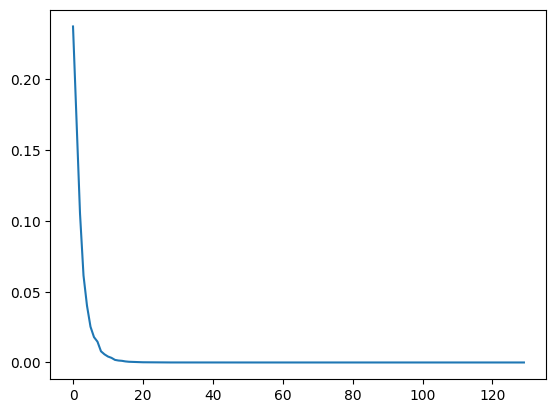

In [11]:
# Método iterativo
import time
d = 0.85
epsilon = 0

p_t = MatrizRala(11,1)
for i in range(11):
    p_t[i,0] = 1/11

i = 0
diferencias = []

while i == 0 or diferencias[i-1] > epsilon:
    if (i != 0):
        p_t = p_next
    
    inicio = time.time()
    
    p_next = unos * ((1 - d) / 11) + d * W @ D @ p_t

    fin = time.time()

    diferencias.append(norma(p_next-p_t))

    i += 1

    print(fin-inicio, "s")


plt.plot(diferencias)
plt.show()
plt.close()